In [33]:
import os
import zipfile
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Ruta principal que contiene las carpetas comprimidas
ruta_principal = r'C:\Users\jdiaz\OneDrive\Escritorio\FITIZENS\LABELED'

# Lista para almacenar los datos de los archivos JSON
datos_json = []

# Recorre cada carpeta comprimida en la carpeta principal
for archivo_zip in os.listdir(ruta_principal):
    if archivo_zip.endswith('.zip'):
        ruta_zip = os.path.join(ruta_principal, archivo_zip)
        
        # Extraer la carpeta comprimida a una ubicación temporal
        carpeta_temporal = r'C:\Users\jdiaz\OneDrive\Escritorio\FITIZENS\LABELED\Descomprimidos'
        with zipfile.ZipFile(ruta_zip, 'r') as zip_ref:
            zip_ref.extractall(carpeta_temporal)
        
        # Buscar archivos JSON dentro de la carpeta extraída
        for archivo_json in os.listdir(carpeta_temporal):
            if archivo_json.endswith('.json'):
                ruta_json = os.path.join(carpeta_temporal, archivo_json)
                
                # Leer el archivo JSON y agregar los datos a la lista
                with open(ruta_json, 'r') as f:
                    json_data = json.load(f)
                    datos_json.extend(json_data['data'])
        
        # Limpiar la carpeta temporal después de procesar la carpeta comprimida
        for archivo_temporal in os.listdir(carpeta_temporal):
            ruta_temporal = os.path.join(carpeta_temporal, archivo_temporal)
            os.remove(ruta_temporal)

In [6]:
# Convertir la lista de datos JSON a un DataFrame
df = pd.DataFrame(datos_json)
df.head()

,time,accX,accY,accZ,gyroX,gyroY,gyroZ,magnX,magnY,magnZ,linAccX,linAccY,linAccZ,exercise
0,1970-01-01 00:00:00.000,0.229719,9.351484,2.597228,2.80,-3.85,-2.17,118.426224,91.767258,137.435638,-0.109653,-0.043982,-0.099565,NO_EXERCISE
1,1970-01-01 00:00:00.009,0.311078,9.401736,2.568513,2.31,-4.20,-2.17,118.233528,91.525688,136.693176,-0.075312,0.038784,-0.056127,NO_EXERCISE
2,1970-01-01 00:00:00.018,0.366115,9.428058,2.613979,2.17,-4.55,-2.17,117.496239,95.366234,137.098541,-0.007308,0.046748,-0.016523,NO_EXERCISE
3,1970-01-01 00:00:00.027,0.327828,9.394557,2.642693,2.73,-5.25,-2.31,117.116760,91.684502,134.205460,-0.005169,-0.008202,-0.042309,NO_EXERCISE
4,1970-01-01 00:00:00.036,0.390044,9.423272,2.678587,2.52,-5.67,-2.38,114.384750,90.533600,132.057144,0.061284,0.011314,-0.002824,NO_EXERCISE


In [8]:
len(df)

173024

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173024 entries, 0 to 173023
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   time      173024 non-null  object 
 1   accX      173024 non-null  float64
 2   accY      173024 non-null  float64
 3   accZ      173024 non-null  float64
 4   gyroX     173024 non-null  float64
 5   gyroY     173024 non-null  float64
 6   gyroZ     173024 non-null  float64
 7   magnX     173024 non-null  float64
 8   magnY     173024 non-null  float64
 9   magnZ     173024 non-null  float64
 10  linAccX   173024 non-null  float64
 11  linAccY   173024 non-null  float64
 12  linAccZ   173024 non-null  float64
 13  exercise  173024 non-null  object 
dtypes: float64(12), object(2)
memory usage: 18.5+ MB


In [10]:
df['time'] = pd.to_datetime(df['time'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173024 entries, 0 to 173023
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   time      173024 non-null  datetime64[ns]
 1   accX      173024 non-null  float64       
 2   accY      173024 non-null  float64       
 3   accZ      173024 non-null  float64       
 4   gyroX     173024 non-null  float64       
 5   gyroY     173024 non-null  float64       
 6   gyroZ     173024 non-null  float64       
 7   magnX     173024 non-null  float64       
 8   magnY     173024 non-null  float64       
 9   magnZ     173024 non-null  float64       
 10  linAccX   173024 non-null  float64       
 11  linAccY   173024 non-null  float64       
 12  linAccZ   173024 non-null  float64       
 13  exercise  173024 non-null  object        
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 18.5+ MB


In [13]:
df.head()

,time,accX,accY,accZ,gyroX,gyroY,gyroZ,magnX,magnY,magnZ,linAccX,linAccY,linAccZ,exercise
0,1970-01-01 00:00:00.000,0.229719,9.351484,2.597228,2.80,-3.85,-2.17,118.426224,91.767258,137.435638,-0.109653,-0.043982,-0.099565,NO_EXERCISE
1,1970-01-01 00:00:00.009,0.311078,9.401736,2.568513,2.31,-4.20,-2.17,118.233528,91.525688,136.693176,-0.075312,0.038784,-0.056127,NO_EXERCISE
2,1970-01-01 00:00:00.018,0.366115,9.428058,2.613979,2.17,-4.55,-2.17,117.496239,95.366234,137.098541,-0.007308,0.046748,-0.016523,NO_EXERCISE
3,1970-01-01 00:00:00.027,0.327828,9.394557,2.642693,2.73,-5.25,-2.31,117.116760,91.684502,134.205460,-0.005169,-0.008202,-0.042309,NO_EXERCISE
4,1970-01-01 00:00:00.036,0.390044,9.423272,2.678587,2.52,-5.67,-2.38,114.384750,90.533600,132.057144,0.061284,0.011314,-0.002824,NO_EXERCISE


In [14]:
df.count()

time        173024
accX        173024
accY        173024
accZ        173024
gyroX       173024
gyroY       173024
gyroZ       173024
magnX       173024
magnY       173024
magnZ       173024
linAccX     173024
linAccY     173024
linAccZ     173024
exercise    173024
dtype: int64

In [22]:
# Count occurrences of each exercise type in the 'exercise' column
exercise_counts = df['exercise'].value_counts()

# Get the count of 'SQUAT'
squat_count = exercise_counts.get('SQUAT', 0)  

print(f"The number of 'SQUAT' exercises is: {squat_count}")

The number of 'SQUAT' exercises is: 95650


In [23]:
# Filter the DataFrame for 'SQUAT' exercises and count the occurrences
squat_count = len(df[df['exercise'] == 'SQUAT']) 

print(f"The number of 'SQUAT' exercises is: {squat_count}")

The number of 'SQUAT' exercises is: 95650


In [26]:
df["exercise"].count() - squat_count

77374

In [27]:
# Check null values
((df.isnull().sum())/len(df))*100

time        0.0
accX        0.0
accY        0.0
accZ        0.0
gyroX       0.0
gyroY       0.0
gyroZ       0.0
magnX       0.0
magnY       0.0
magnZ       0.0
linAccX     0.0
linAccY     0.0
linAccZ     0.0
exercise    0.0
dtype: float64

# **EDA**

<Axes: xlabel='exercise', ylabel='count'>

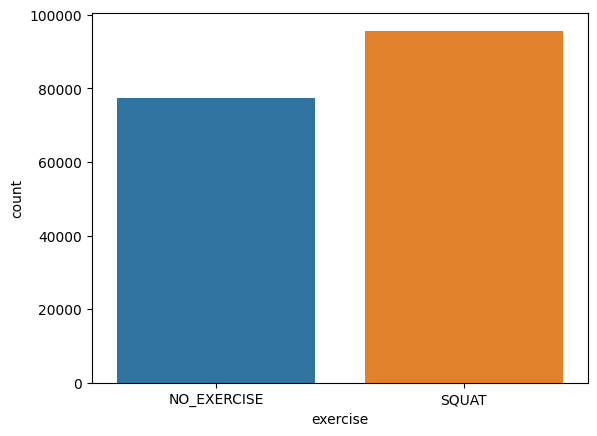

In [28]:
sns.countplot(x=df['exercise'], label = "Exercise")

Podemos observar que el target está nivelado

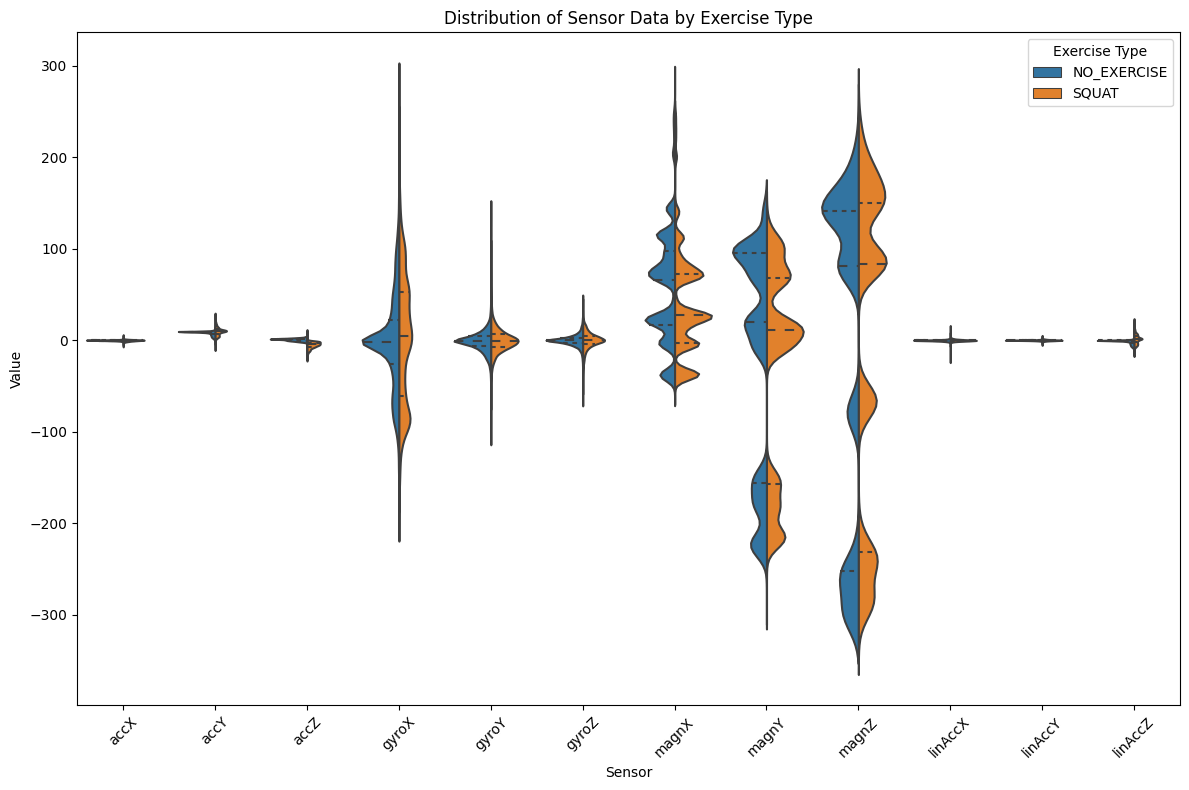

In [16]:
# Select the sensor data columns and the 'exercise' column
sensor_columns = ['accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ', 'magnX', 'magnY', 'magnZ', 'linAccX', 'linAccY', 'linAccZ']
data_for_plot = df[sensor_columns + ['exercise']]

# Melt the DataFrame to long format for Seaborn plots
data_for_plot_melted = data_for_plot.melt(id_vars='exercise', var_name='Sensor', value_name='Value')

# Plotting using Violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Sensor', y='Value', hue='exercise', data=data_for_plot_melted, split=True, inner='quart')
plt.title('Distribution of Sensor Data by Exercise Type')
plt.xlabel('Sensor')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Exercise Type')
plt.tight_layout()
plt.show()

C:\Users\jdiaz\AppData\Local\Temp\ipykernel_10788\2059851146.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_for_heatmap.corr()
C:\Users\jdiaz\anaconda3\envs\Python_S1\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


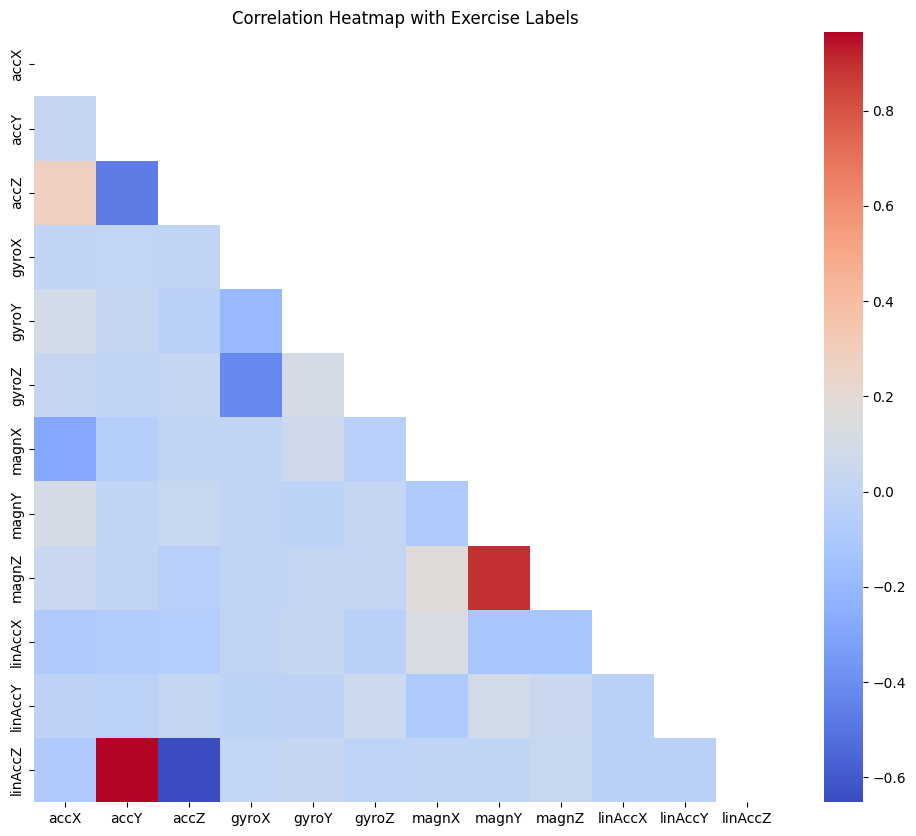

In [19]:
# Select the sensor data columns and the 'exercise' column
sensor_columns = ['accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ', 'magnX', 'magnY', 'magnZ', 'linAccX', 'linAccY', 'linAccZ']
data_for_heatmap = df[sensor_columns + ['exercise']]

# Compute the correlation matrix
correlation_matrix = data_for_heatmap.corr()

# Create a mask to only show the lower triangle of the heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)

# Annotate exercise labels on the heatmap
for i in range(len(sensor_columns)):
    heatmap.text(i + 0.5, i + 0.5, 'exercise', ha='center', va='center', color='white')

plt.title('Correlation Heatmap with Exercise Labels')
plt.show()

Correlación bastante alta con linear acceleration Z and acceleration Y se puede dar por varias razones:
- Patrón de Movimiento durante Sentadillas: Las sentadillas suelen implicar un movimiento vertical (hacia arriba y hacia abajo), que afecta principalmente al eje Z (eje vertical) para la aceleración lineal. Sin embargo, durante las sentadillas, también puede haber algunos movimientos laterales o cambios en el equilibrio corporal que provocan cambios en la aceleración a lo largo del eje Y.

- Mecánica Corporal durante las Sentadillas: Mientras se realizan las sentadillas, las personas pueden balancearse ligeramente hacia adelante o hacia atrás, lo que conduce a movimientos horizontales mínimos. Estos cambios sutiles en la posición del cuerpo pueden influir en la aceleración del eje Y, aunque el movimiento principal sea en dirección vertical.

- Colocación de Sensores u Orientación del Dispositivo: La ubicación de los sensores o la orientación del dispositivo podrían tener un papel relevante. Dependiendo de cómo estén posicionados los sensores en el cuerpo o en el dispositivo, los movimientos durante las sentadillas podrían impactar tanto en los ejes vertical como horizontal, dando lugar a correlaciones observadas.

C:\Users\jdiaz\anaconda3\envs\Python_S1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


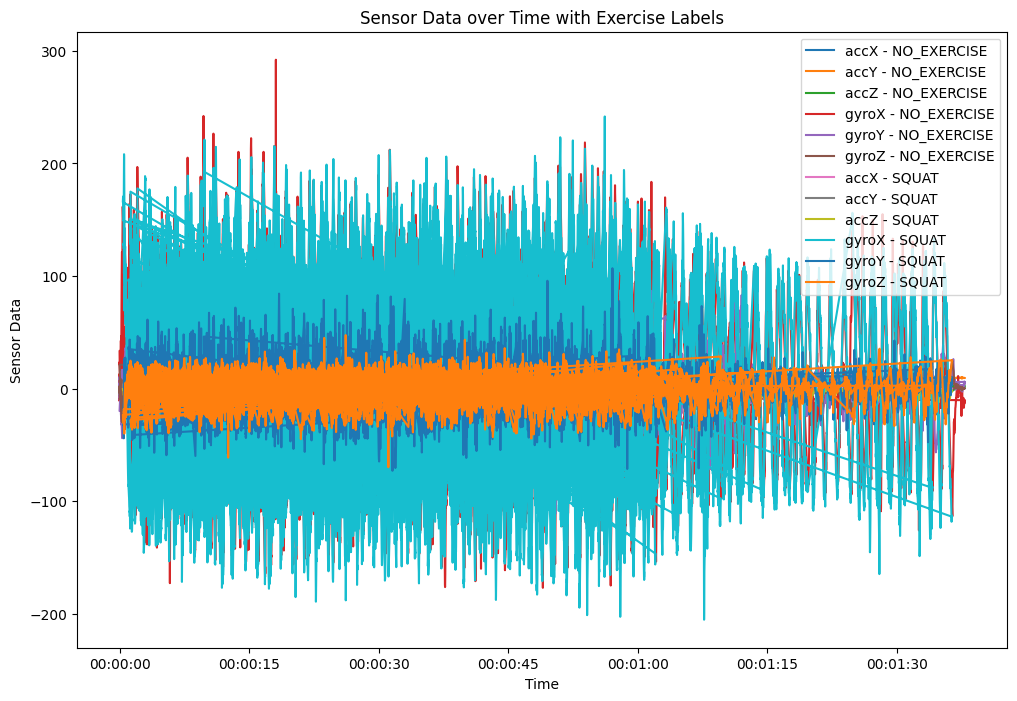

In [20]:
# Select columns for the time series plot and the 'exercise' column
columns_for_plot = ['accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ', 'exercise']

# Plotting the time series for sensor data with exercise labels
plt.figure(figsize=(12, 8))

for exercise_type in df['exercise'].unique():
    for column in columns_for_plot[:-1]:  # Exclude the 'exercise' column for plotting
        plt.plot(df[df['exercise'] == exercise_type]['time'],
                 df[df['exercise'] == exercise_type][column],
                 label=f"{column} - {exercise_type}")

plt.xlabel('Time')
plt.ylabel('Sensor Data')
plt.title('Sensor Data over Time with Exercise Labels')
plt.legend()
plt.show()

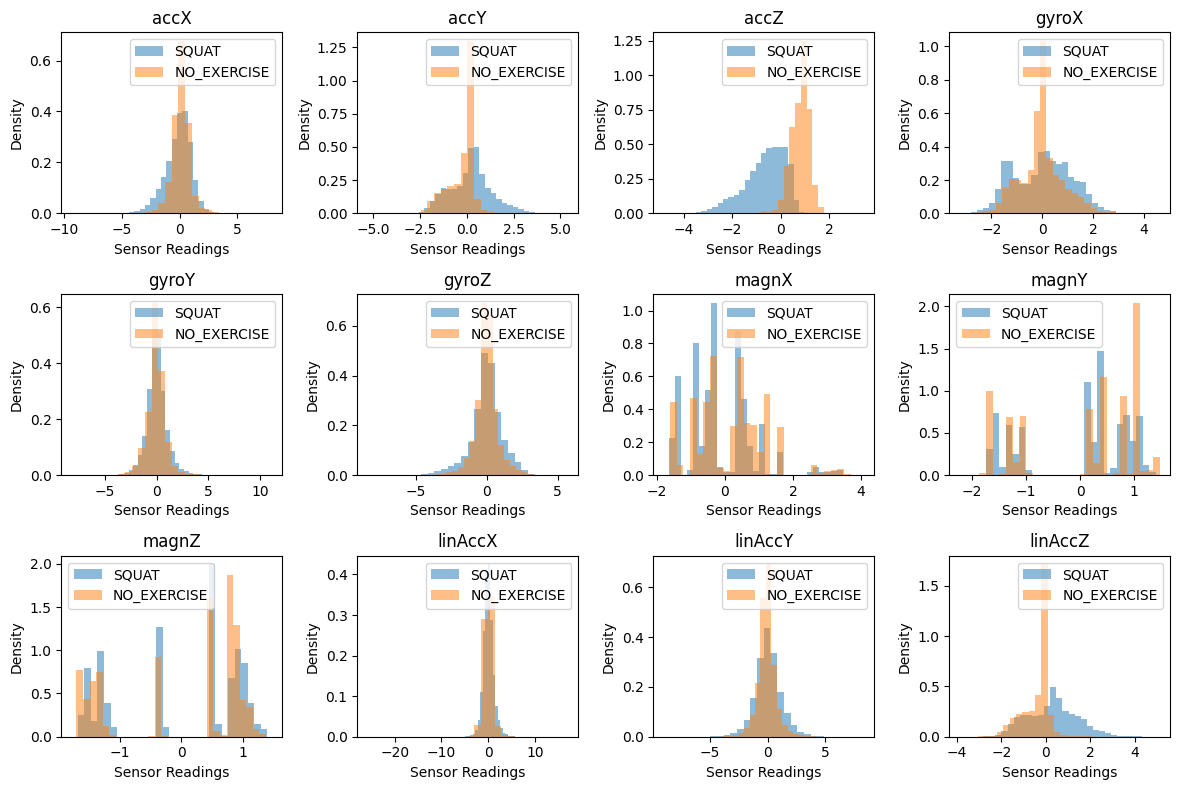

In [39]:
exercises_data = df[df['exercise'] == 'SQUAT']
no_exercises_data = df[df['exercise'] == 'NO_EXERCISE']

# Plot histograms for each sensor reading
plt.figure(figsize=(12, 8))

for i, sensor in enumerate(sensor_columns, start=1):
    plt.subplot(3, 4, i)
    plt.hist(exercises_data[sensor], bins=30, alpha=0.5, label='SQUAT', density=True)
    plt.hist(no_exercises_data[sensor], bins=30, alpha=0.5, label='NO_EXERCISE', density=True)
    plt.title(sensor)
    plt.xlabel('Sensor Readings')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()